## Adjust Class Weights in Logistic Regression

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load data set into pandas
df = pd.read_csv("Cleaned_dataset.csv")
df.head()

# Identify binary columns
binary_columns = [column for column in df.columns if df[column].nunique() == 2]
# Convert binary columns to 0 and 1
for col in binary_columns:
    unique_values = df[col].unique()
    if set(unique_values) == {"Yes", "No"}:
        df[col] = df[col].map({"Yes": 1, "No": 0})

categorical_columns = ['Sex', 'GeneralHealth', 'LastCheckupTime', 'RemovedTeeth', 'HadDiabetes',
                       'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory',
                       'HighRiskLastYear', 'CovidPos']

# Extract the categorical columns into a new DataFrame
Categorical_col = df[categorical_columns]

# Use pd.get_dummies to transform the categorical columns
Transform_df = pd.get_dummies(Categorical_col, dtype=int)

# Select numeric columns
numeric_columns = df.select_dtypes(include=["float64"]).columns
df_numeric = df[numeric_columns]

# Create standard scaler instance, fitting it, and scaling it
scaler = StandardScaler()
scaled_numeric_df = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_columns)

# Drop the original columns
df = df.drop(columns=categorical_columns + numeric_columns.tolist())

# Combine the original DataFrame and the dummy variables DataFrame
merged_df = pd.concat([df, Transform_df, scaled_numeric_df], axis=1)
merged_df = merged_df.drop(columns='State')

# Split the data into training and testing sets
X = merged_df.drop(columns="HadHeartAttack")
y = merged_df["HadHeartAttack"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Create and fit the Logistic Regression model with class weights
classifier = LogisticRegression(solver='lbfgs', max_iter=200, random_state=42, class_weight='balanced')
classifier.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_test = classifier.predict(X_test)
print("Test Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))


Test Set Evaluation:
Accuracy: 0.8320023395496366
Confusion Matrix:
 [[70315 13939]
 [  997  3655]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.83      0.90     84254
           1       0.21      0.79      0.33      4652

    accuracy                           0.83     88906
   macro avg       0.60      0.81      0.62     88906
weighted avg       0.95      0.83      0.87     88906



## Using Random Forest Classifier


In [3]:
from sklearn.ensemble import RandomForestClassifier

# Create and fit the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_test_rf = rf_classifier.predict(X_test)
print("Random Forest Test Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_test_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_test_rf))


Random Forest Test Set Evaluation:
Accuracy: 0.9494859739500147
Confusion Matrix:
 [[83847   407]
 [ 4084   568]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     84254
           1       0.58      0.12      0.20      4652

    accuracy                           0.95     88906
   macro avg       0.77      0.56      0.59     88906
weighted avg       0.93      0.95      0.93     88906



## Using Gradient Boosting Classifier with Class Weight


In [4]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and fit the Gradient Boosting model
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_test_gb = gb_classifier.predict(X_test)
print("Gradient Boosting Test Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_test_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_test_gb))


Gradient Boosting Test Set Evaluation:
Accuracy: 0.9514768407081636
Confusion Matrix:
 [[83470   784]
 [ 3530  1122]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     84254
           1       0.59      0.24      0.34      4652

    accuracy                           0.95     88906
   macro avg       0.77      0.62      0.66     88906
weighted avg       0.94      0.95      0.94     88906



## Using XGBoost Classifier


In [5]:
import xgboost as xgb

# Create and fit the XGBoost model
xgb_classifier = xgb.XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]))
xgb_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_test_xgb = xgb_classifier.predict(X_test)
print("XGBoost Test Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_test_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_test_xgb))


XGBoost Test Set Evaluation:
Accuracy: 0.8461296200481407
Confusion Matrix:
 [[71825 12429]
 [ 1251  3401]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91     84254
           1       0.21      0.73      0.33      4652

    accuracy                           0.85     88906
   macro avg       0.60      0.79      0.62     88906
weighted avg       0.94      0.85      0.88     88906



## Plotting Comparisons

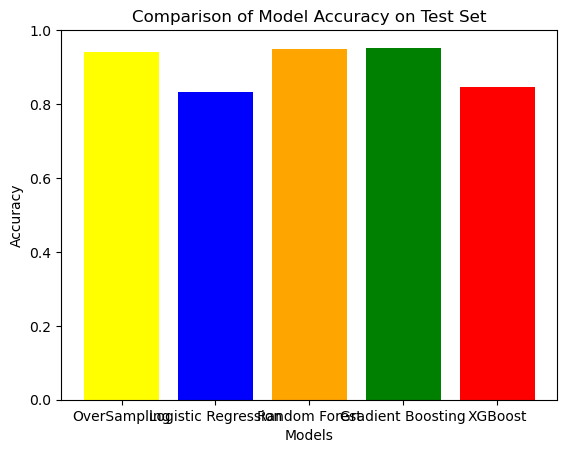

In [7]:
import matplotlib.pyplot as plt
# Plot the comparison of accuracy
labels = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost']
accuracies = [
    accuracy_score(y_test, y_pred_test),
    accuracy_score(y_test, y_pred_test_rf),
    accuracy_score(y_test, y_pred_test_gb),
    accuracy_score(y_test, y_pred_test_xgb)
]

plt.bar(labels, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy on Test Set')
plt.ylim(0, 1)
plt.show()
